<a href="https://colab.research.google.com/github/Theophine/Machine_Learning/blob/master/Churn_Prediction_non_linear_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Information about data
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn_data.csv to churn_data.csv


In [ ]:
import pandas as pd
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['churn_data.csv']))

In [ ]:
dataframe.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


Make a copy of your dataframe for cleaning purposes

In [ ]:
df = dataframe.copy()

In [ ]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')
sns.set(style='darkgrid')

#understanding the data

In [ ]:
df.shape

(200, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

#Data Wrangling 

The datatypes needs to be fixed as some variables are categories. 

variables like: equip, callcard, voice, pager, internet, callwait, confer, ebill, custcat, ed, wireless, needs to be category.

variables like: Address, age and tenure, needs to be integer

variables like: equipmon, cardmon, wiremon, tollten, cardten, have zeros which signify missing values. 



##Fixing data types

In [ ]:
variables = ['equip','callcard'	,'wireless', 'ed', 'voice',	'pager',	'internet',	'callwait',	'confer',	'ebill', 'custcat', 'churn']

def category(variable, dataframe):
  dataframe[variable] = dataframe[variable].astype('category')

In [ ]:
category(variables, df)

In [ ]:
#Test the code 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tenure    200 non-null    float64 
 1   age       200 non-null    float64 
 2   address   200 non-null    float64 
 3   income    200 non-null    float64 
 4   ed        200 non-null    category
 5   employ    200 non-null    float64 
 6   equip     200 non-null    category
 7   callcard  200 non-null    category
 8   wireless  200 non-null    category
 9   longmon   200 non-null    float64 
 10  tollmon   200 non-null    float64 
 11  equipmon  200 non-null    float64 
 12  cardmon   200 non-null    float64 
 13  wiremon   200 non-null    float64 
 14  longten   200 non-null    float64 
 15  tollten   200 non-null    float64 
 16  cardten   200 non-null    float64 
 17  voice     200 non-null    category
 18  pager     200 non-null    category
 19  internet  200 non-null    category
 20  callwait  

In [ ]:
#next convert the necessary columns to integer
int_variables = ['address', 'age', 'tenure']

def integer(variable, dataframe):
  dataframe[variable] = dataframe[variable].astype('int')

In [ ]:
integer(int_variables, df)

In [ ]:
#test the code 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tenure    200 non-null    int64   
 1   age       200 non-null    int64   
 2   address   200 non-null    int64   
 3   income    200 non-null    float64 
 4   ed        200 non-null    category
 5   employ    200 non-null    float64 
 6   equip     200 non-null    category
 7   callcard  200 non-null    category
 8   wireless  200 non-null    category
 9   longmon   200 non-null    float64 
 10  tollmon   200 non-null    float64 
 11  equipmon  200 non-null    float64 
 12  cardmon   200 non-null    float64 
 13  wiremon   200 non-null    float64 
 14  longten   200 non-null    float64 
 15  tollten   200 non-null    float64 
 16  cardten   200 non-null    float64 
 17  voice     200 non-null    category
 18  pager     200 non-null    category
 19  internet  200 non-null    category
 20  callwait  

In [ ]:
#Finally, select the portion of the dataframe where the columns stated below are zero and assign those zeros to nan
df[df[['longmon',	'tollmon',	'equipmon',	'cardmon', 'wiremon',	'longten',	'tollten',	'cardten']] == 0] = np.nan

In [ ]:
df[['longmon',	'tollmon',	'equipmon',	'cardmon', 'wiremon',	'longten',	'tollten',	'cardten']].isna().sum()

longmon       0
tollmon     102
equipmon    115
cardmon      59
wiremon     142
longten       0
tollten     102
cardten      59
dtype: int64

In [ ]:
#Drop all columns with at least 50% missing data points 
df.dropna(axis =1, thresh = int(0.5 *len(df)), inplace = True)

In [ ]:
#check the size of the new dataframe 
df.shape

(200, 24)

From the above, it shows that 4 columns have been dropped

In [ ]:
#check how many columns still have misisng values 
df.isna().sum()

tenure       0
age          0
address      0
income       0
ed           0
employ       0
equip        0
callcard     0
wireless     0
longmon      0
cardmon     59
longten      0
cardten     59
voice        0
pager        0
internet     0
callwait     0
confer       0
ebill        0
loglong      0
logtoll      0
lninc        0
custcat      0
churn        0
dtype: int64

Below we fix missing values

In [ ]:
df['cardmon'] = df['cardmon'].interpolate()
df['cardten'] = df['cardten'].interpolate()

In [ ]:
#test code 
df.isna().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
cardmon     0
longten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [ ]:
#we have to drop address as it will not be useful in the prediction 
del(df['address'])

#Exploratory Data Analysis

##Analysis of Numerical Variables

The Exploratory analysis below is for only integer and float datatypes. 

In [ ]:
df_numeric = df.select_dtypes(exclude= 'category')

In [ ]:
columns = df_numeric.columns.tolist()

def plotbox(variables, dataframe):
  for variable in variables:
    fig, ax = plt.subplots(figsize = (7,5))
    sns.boxplot(x = 'churn', y = variable, data = dataframe)
    plt.title('PLot of churn distrbution against '+  str(variable))
    plt.show();

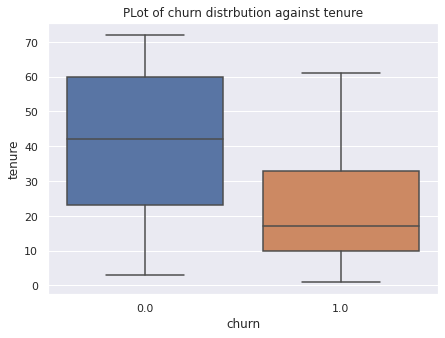

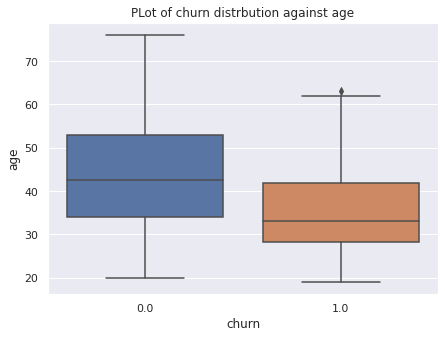

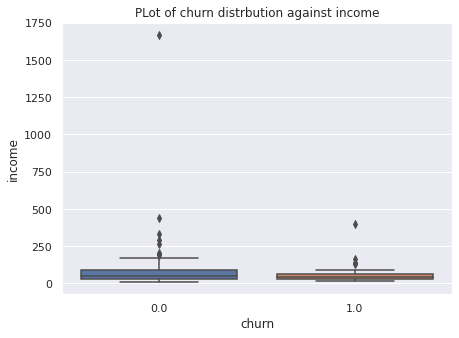

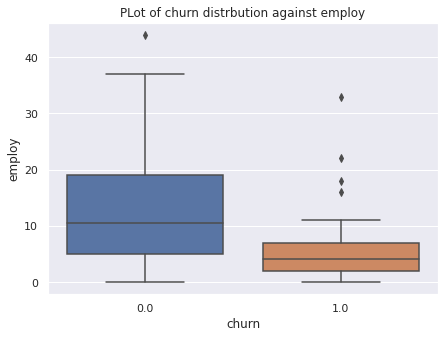

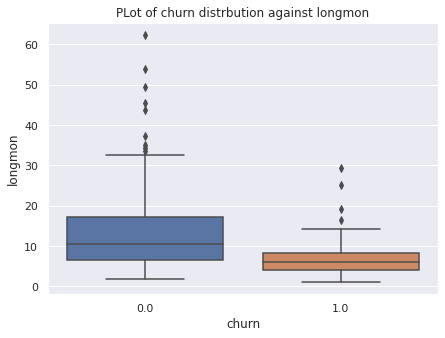

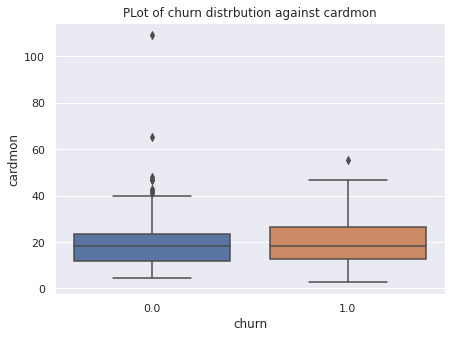

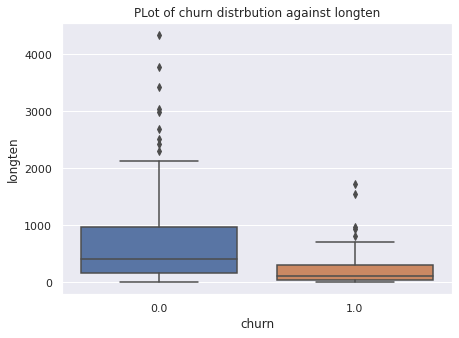

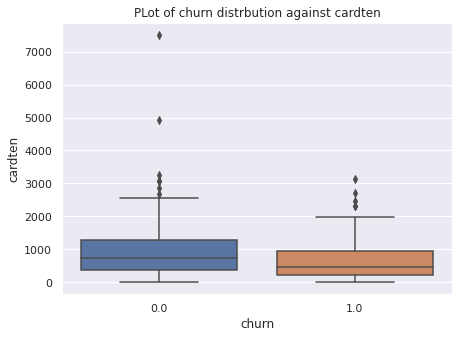

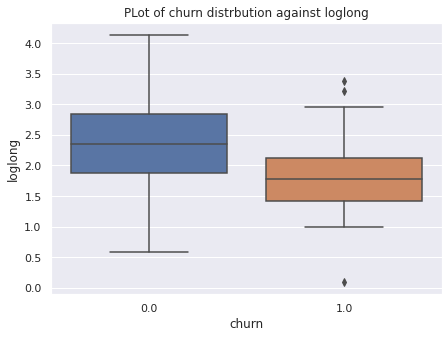

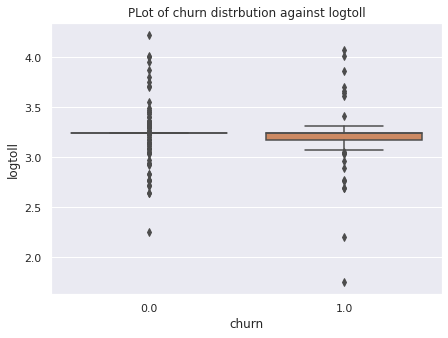

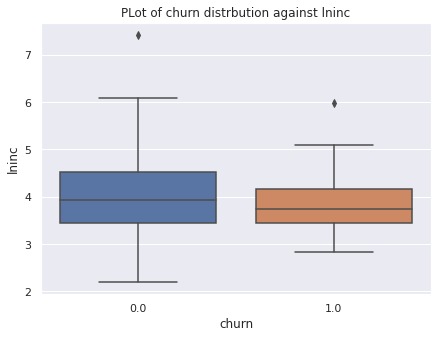

In [ ]:
plotbox(columns, df)

from the above visualization it shows that the variables; Income, cardmon and Logtoll do not yield significantly different result (as their median values as almost same for for churn classes) and and such, should not be included in the model. 

##Analysis of Categorical variables

In [ ]:
df_category = df.select_dtypes(include= 'category').drop('churn', axis = 1)
category_variables = df_category.columns.tolist()

In [ ]:

def plotbox_cat(variables, dataframe):
  for variable in variables:
    fig, ax = plt.subplots(figsize = (7,5))
    sns.boxplot(x = variable, y = 'employ', data = dataframe)
    plt.title('PLot of ' + str(variable) + ' distrbution against employ')
    plt.show();

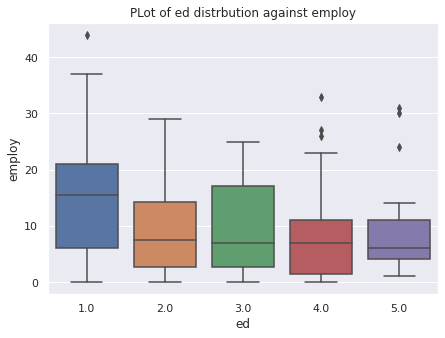

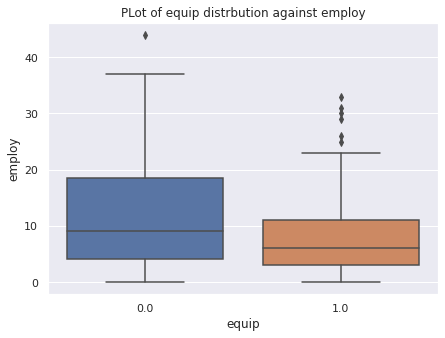

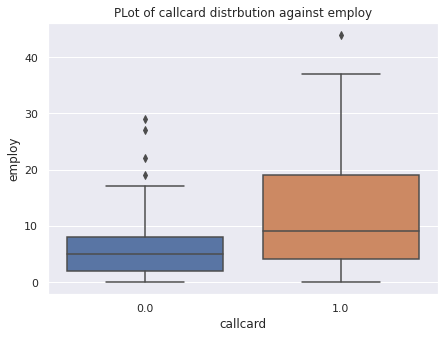

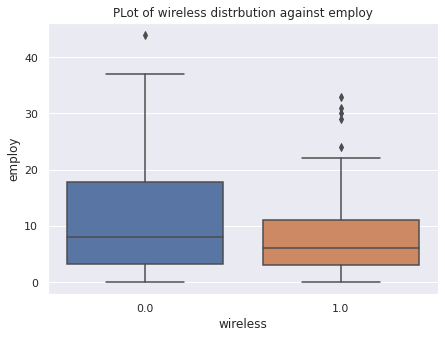

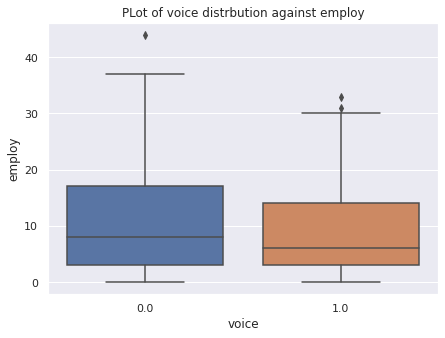

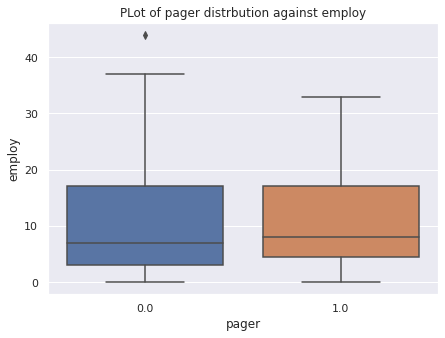

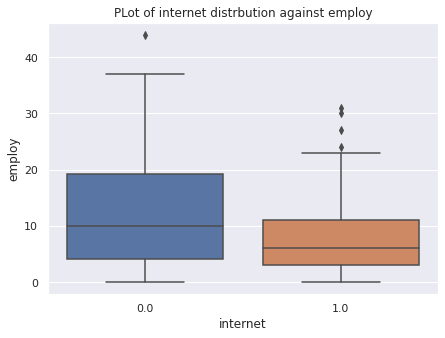

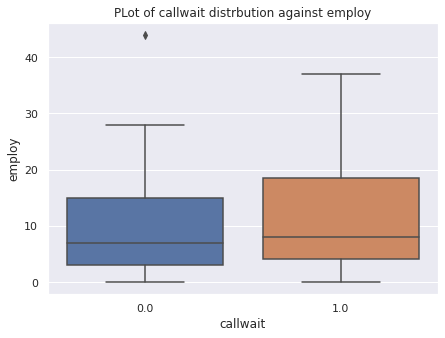

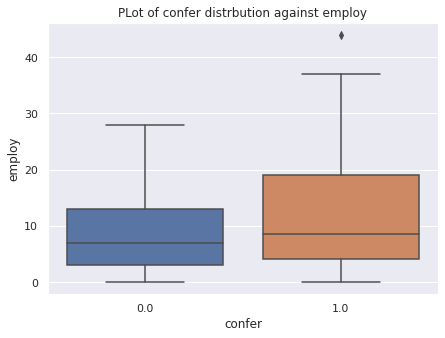

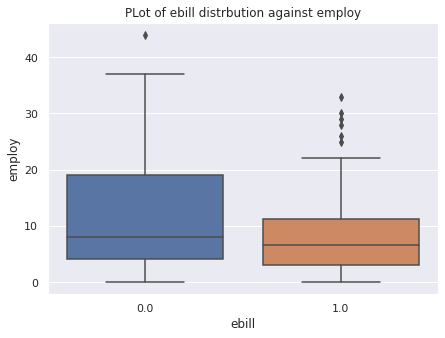

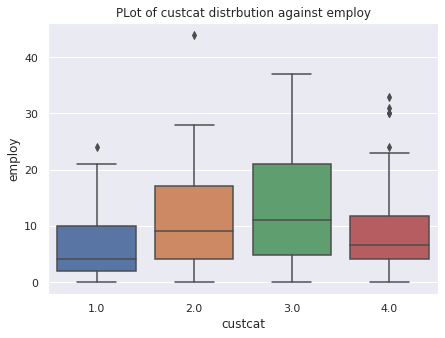

In [ ]:
plotbox_cat(category_variables, df)

###Observation from visual analysis


from the Numerical analysis, Income, Cardmon, and logtoll are likely not useful variables are their medians do not vary 

from the categorical anaysis, Pager is likely not useful as its median do not vary significanly

##Outlier detection

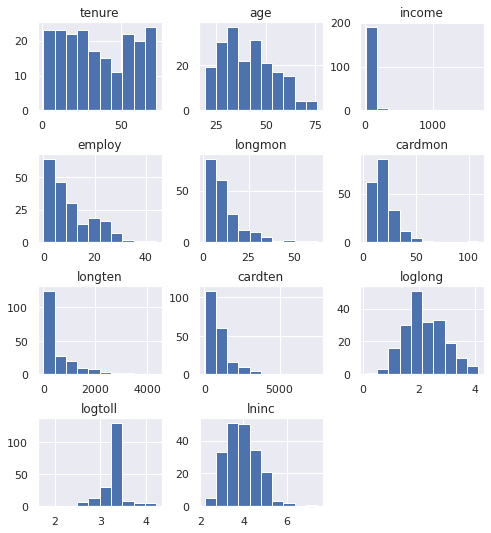

In [ ]:
df_numeric.hist();
plt.subplots_adjust(bottom = 0.04, hspace= 0.5)

From the above, 'Longmon', seems to be the only variable with outlier. 

In [ ]:
longmon_mean = df['longmon'].mean()
longmon_std = df['longmon'].std() * 3 

lower_bound, uppper_bound = longmon_mean - longmon_std, longmon_mean + longmon_std

In [ ]:
df_final = df[(df['longmon'] > lower_bound) & (df['longmon'] < uppper_bound)]


In [ ]:
df_final.shape

(195, 23)

NOTE: I did  not remove the columns which I said had no variable means. 

#Model building Stage

In [ ]:
from mlxtend.plotting import plot_decision_regions    #for plotting the decision region 
from sklearn.neighbors import KNeighborsClassifier    #classifier 
from sklearn.feature_selection import SelectKBest, chi2, f_classif   # for selecting the best features 
from sklearn.metrics import make_scorer  #for setting our scoring parameter 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, f1_score
from sklearn.pipeline import Pipeline   #our pipeline 
from sklearn.impute import SimpleImputer
from sklearn.utils import resample   #for data balancing 
from sklearn.preprocessing import StandardScaler   #for scaling all the datapoints 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#split your data into train and test 
X = df_final.drop('churn', axis = 1)
y = df_final['churn'].astype('int')

In [ ]:
X.shape, y.shape

((195, 22), (195,))

##Plot decision boundary

Start by selecting the best feature and use those to check the nature of the decision boundary 

In [ ]:
X_boundary = X[X.columns[SelectKBest(k = 4).fit(X, y).get_support()]]
X_boundary

,tenure,employ,callcard,loglong
0,11,5.0,1.0,1.482
1,33,0.0,0.0,2.246
2,23,2.0,0.0,1.841
3,38,10.0,1.0,1.800
4,7,15.0,1.0,1.960
...,...,...,...,...
195,55,23.0,1.0,2.854
196,34,7.0,1.0,1.792
197,6,10.0,1.0,1.348
198,24,5.0,1.0,2.163


In [ ]:
classifiers = [LogisticRegression(random_state = 42), LinearSVC( random_state = 42), SVC(random_state = 42), DecisionTreeClassifier(criterion = 'entropy')]

X_bound = np.array(X_boundary.loc[:, 'tenure': 'employ'])
y_bound = np.array(y)

In [ ]:
y_bound.shape

(195,)

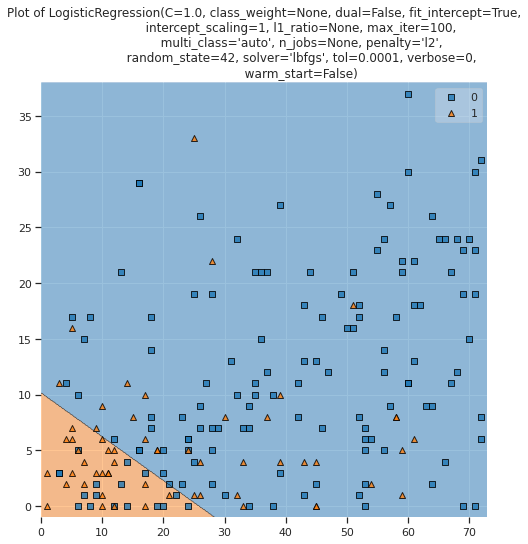

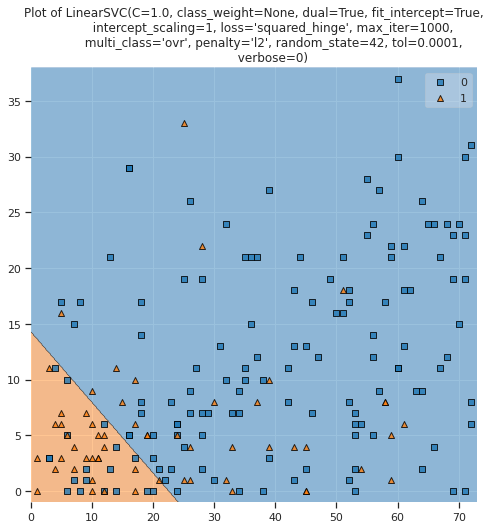

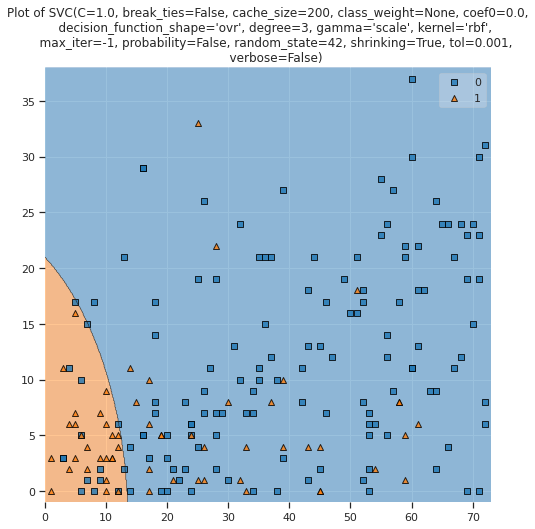

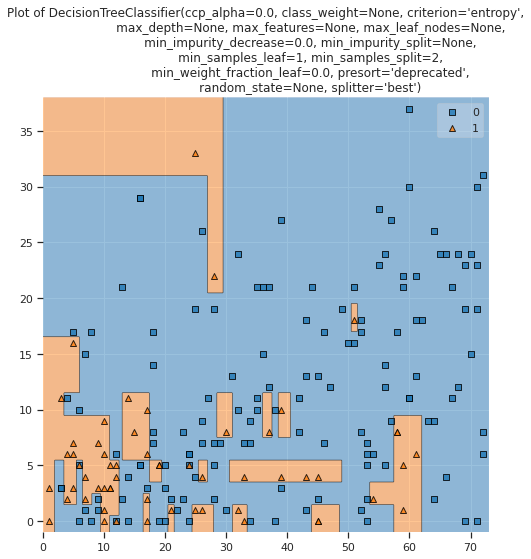

In [ ]:
for classifier in classifiers:
  classifier.fit(X_bound, y_bound)
  plt.title('Plot of ' + str(classifier))
  plot_decision_regions(X_bound, y_bound, classifier)
  plt.show();

The above most certainly look like a non-linear classification job

Below we check the score of applying different model to the dataset

In [ ]:
#we define our split and our scorer function
k_split = StratifiedKFold(n_splits = 7, shuffle = True)
scorer = make_scorer(f1_score, average = 'weighted')

In [ ]:
for classifier in classifiers:
  score = np.mean(cross_val_score(classifier, X, y, cv = k_split, scoring = scorer))
  print('The score of ' + str(classifier) + ' is ' + str(score))
  print(' ')

The score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 0.7321677016733474
 
The score of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0) is 0.46175593698309686
 
The score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) is 0.5799338956468597
 
The score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy

##Check for data imbalance

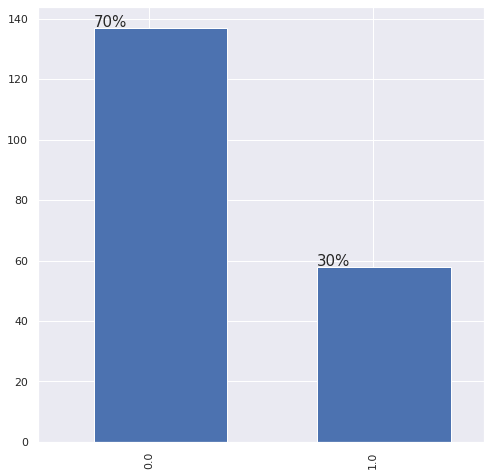

In [ ]:
ax = df_final['churn'].value_counts().plot.bar();

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    
    i.set_width(.60)
    
    x, y = i.get_xy()
    
    ax.annotate('{:.0%}'.format(height/195), (x, y + height + 0.3)).set_fontsize(15) 


The data is imbalanced and we have to balance it

In [ ]:
y = df_final[['churn']].astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

In [ ]:
df_sample = pd.concat([X_train, y_train], axis = 1)

higher_sample = df_sample[df_sample['churn'] == 0]
lower_sample = df_sample[df_sample['churn'] == 1]

higher_sample.shape, lower_sample.shape

#I will upsample given that we have very little data for training 
upsampled_data = resample(lower_sample, replace = True, n_samples = len(higher_sample), random_state = 42)

In [ ]:
upsampled_data.shape
new_sample = pd.concat([upsampled_data, higher_sample])

#test code 
new_sample.shape

X_train = new_sample.drop('churn', axis = 1)
y_train = new_sample['churn']

X_train.shape, y_train.shape

((246, 22), (246,))

Instantiate the modules that would go into our pipeline

In [ ]:
steps = [('scale', StandardScaler()), ('best_var', SelectKBest(score_func= f_classif)), ('imp', SimpleImputer()), ('svc', SVC(probability= True,random_state= 42))]

In [ ]:
pipeline = Pipeline(steps)

In [ ]:
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#tune your hyperparameters 
params = {'best_var__k': np.arange(1, len(X_train.columns), 1), 'svc__C': np.linspace(0.001, 2, num = 15), 'svc__kernel': ['rbf'], 'svc__gamma': np.linspace(0.01, 10, num = 15)}

In [ ]:
gridsearch = GridSearchCV(pipeline, param_grid= params, scoring = scorer, n_jobs = -1, cv =k_split, return_train_score= True)

In [ ]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('best_var',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7f795c6e4290>)),
                                       ('imp',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_val...
       1.71442857e+00, 1.85721429e+00, 2.000000

In [ ]:
gridsearch.best_params_

{'best_var__k': 10,
 'svc__C': 1.0005,
 'svc__gamma': 4.291428571428572,
 'svc__kernel': 'rbf'}

In [ ]:
gridsearch.best_score_

0.9510553059273651

In [ ]:
y_pred_probab = gridsearch.predict_proba(X_test)

In [ ]:
y_pred = gridsearch.predict(X_test)

Here, I am varying the Threshold so we would get less FP. So rather than using the default threshold which is 0.5, I will opt for 0.6

In [ ]:
[s[1] > 0.6 for s in y_pred_probab] == gridsearch.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, [s[1] > 0.6 for s in y_pred_probab])

In [ ]:
#plot_roc_curve(gridsearch.best_estimator_, X_test, y_test)

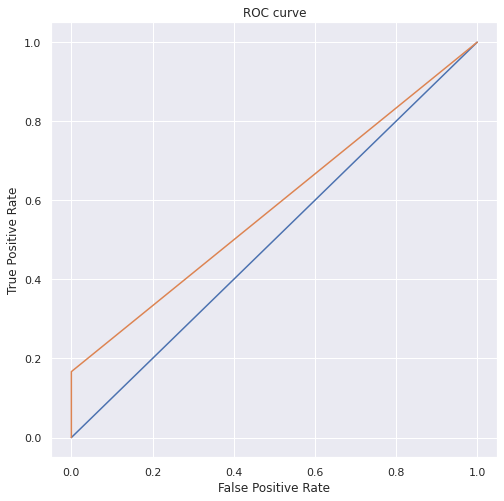

In [ ]:
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.title('ROC curve');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

In [ ]:
#below is the roc auc score
roc_auc_score(y_test, [s[1] > 0.6 for s in y_pred_probab])

0.5833333333333334

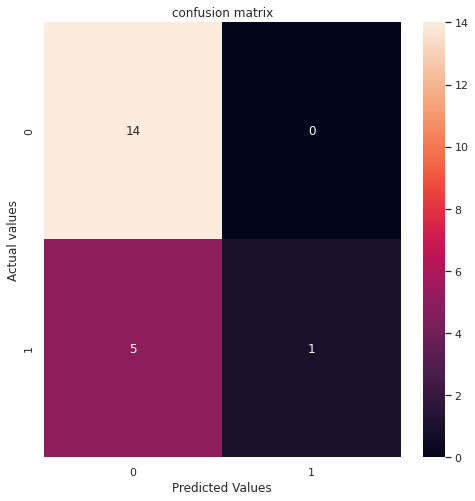

In [ ]:
#confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, [s[1] > 0.6 for s in y_pred_probab])), annot = True)
plt.xlabel('Predicted Values');
plt.ylabel('Actual values')
plt.title('confusion matrix');

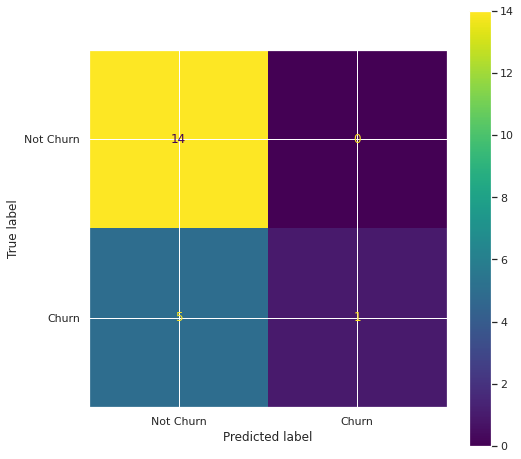

In [ ]:
plot_confusion_matrix(gridsearch.best_estimator_, X_test, y_test, display_labels= ['Not Churn', 'Churn'])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.17      0.29         6

    accuracy                           0.75        20
   macro avg       0.87      0.58      0.57        20
weighted avg       0.82      0.75      0.68        20



#Cost Minimization

In [ ]:
tn, fn, fp, tp = confusion_matrix(y_test, [s[1] > 0.6 for s in y_pred_probab]).ravel()

In [ ]:
def cost_of_loss(fp_cost = 10, fn_cost = 0):
    tn, fn, fp, tp = confusion_matrix(y_test, [s[1] > 0.6 for s in y_pred_probab]).ravel()
    
    return ((fp_cost * fp) + (fn_cost * fn))

In [ ]:
print('the cost of fp is {} given the threshold'.format(cost_of_loss()))

the cost of fp is 50 given the threshold


#Conclusion

Based on the poor performanc of the model, we might need to try out a different model, or add more data in order to improve the accuracy. 